# First Name: Li 
# Last Name: Chengjie

# Import Libraries  

In [87]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [88]:
bottle = pd.read_csv('bottle.csv')
bottle.head(1)

C:\Users\flab\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,NaN,25.649,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data management 

In [89]:
#bottle. info()

In [90]:
sub1=bottle[(bottle['Depthm']>=0)]
sub2=sub1.copy()

In [91]:
recode2 = {1:1, 2:2.5, 3:4, 4:8, 5:14, 6:26, 7:30}
sub2['Depthm']= sub2['Depthm'].map(recode2)


In [92]:
ct1= pd.crosstab(sub2['Depthm'], sub2['R_PRES'])
print (ct1) 

R_PRES     1     2     3    4     5    6    7  8
Depthm                                          
1.0     7437     5     0    0     0    0    0  0
2.5        0  6411     0    0     0    0    0  0
4.0        0     0  1130    0     0    0    0  0
8.0        0     0     0  443     1    0    0  0
14.0       0     0     0    0  1132    0    0  0
26.0       0     0     0    0     0  589    0  0
30.0       0     0     0    0     0    0  333  9


# Chart/Plot

C:\Users\flab\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(16.424999999999997, 0.5, 'pressure')

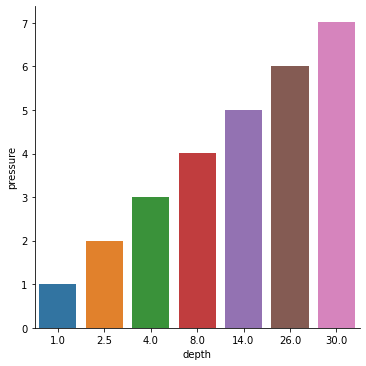

In [93]:
%matplotlib inline
sns.factorplot(x="Depthm", y="R_PRES", data=sub2, kind="bar", ci=None)
plt.xlabel('depth')
plt.ylabel('pressure')

# CHI_Squared

In [25]:
colsum= ct1.sum(axis=0)
colpct= ct1/colsum
print(colpct)

R_PRES    1         2    3    4         5    6    7    8
Depthm                                                  
1.0     0.0  0.000000  0.0  0.0  0.000000  0.0  1.0  1.0
2.5     0.0  0.000000  0.0  0.0  0.000000  1.0  0.0  0.0
4.0     0.0  0.000000  0.0  0.0  0.999117  0.0  0.0  0.0
8.0     0.0  0.000000  0.0  1.0  0.000883  0.0  0.0  0.0
14.0    0.0  0.000000  1.0  0.0  0.000000  0.0  0.0  0.0
26.0    0.0  0.999221  0.0  0.0  0.000000  0.0  0.0  0.0
30.0    1.0  0.000779  0.0  0.0  0.000000  0.0  0.0  0.0


In [26]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1) 
print (cs1)

chi-square value, p value, expected counts
(104859.83427920558, 0.0, 42, array([[1.45423328e+02, 1.25458662e+02, 2.20960549e+01, 8.66243568e+00,
        2.21547170e+01, 1.15173242e+01, 6.51149228e+00, 1.75986278e-01],
       [2.50451286e+02, 2.16067696e+02, 3.80543168e+01, 1.49186392e+01,
        3.81553459e+01, 1.98353917e+01, 1.12142367e+01, 3.03087479e-01],
       [4.81342710e+02, 4.15260835e+02, 7.31366495e+01, 2.86721555e+01,
        7.33308176e+01, 3.81216695e+01, 2.15526587e+01, 5.82504288e-01],
       [1.88795197e+02, 1.62876158e+02, 2.86861063e+01, 1.12459691e+01,
        2.87622642e+01, 1.49523156e+01, 8.45351630e+00, 2.28473413e-01],
       [4.80492281e+02, 4.14527158e+02, 7.30074328e+01, 2.86214980e+01,
        7.32012579e+01, 3.80543168e+01, 2.15145798e+01, 5.81475129e-01],
       [2.72604957e+03, 2.35179966e+03, 4.14204117e+02, 1.62382676e+02,
        4.15303774e+02, 2.15899314e+02, 1.22061921e+02, 3.29897084e+00],
       [3.16444563e+03, 2.73000983e+03, 4.80815323e+02, 1

# conclusion

Indicates that there is there is no difference in the pressure rate between Depthm and R_PRES 
Accept null hypothesis
